In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import optimize
import sympy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


En este codigo:
se calcula sobre las tablas de metrica de f-score en el experimento iterativo de variaciones de parametros de selección ID/COV en alineamientos entre los ensambles de spades y La base de datos de cromosomas especifica de Klepsiella en estas posibilidades:
con/sin subject en el paramtro del experimento 
con/sin 3 ó 1 hit en la selección de parametros de creación del archivo csv del alineamiento.

In [ ]:
#columnas=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
#columnas=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
#f-score
#dataf = pd.read_csv("/content/drive/MyDrive/kp/homologia/tabla_croNO_fscore_nos_3hit50-100.txt",sep='\t',index_col=False,usecols=columnas)
#dataf.describe()
#precisión

#recall
#datar = pd.read_csv("/content/drive/MyDrive/kp/maximizacion/tabla_recall.txt",sep='\t',usecols=columnas)
#datar.describe()

In [4]:
columnas=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
#datap = pd.read_csv("/content/drive/MyDrive/kp/homologia/tabla_croNO_fscore_nos_and_3hit.txt",sep='\t',index_col=False,usecols=columnas)
datap = pd.read_csv("/content/drive/MyDrive/kp/homologia/CroNO_fscore_nos_and_nohps.txt",sep='\t',index_col=False,usecols=columnas)
datap.describe()

,ID,COV,ERR2929690,ERR2929692,SRR2244244,SRR3465557,SRR4025861,SRR4245476,SRR5146463,SRR5167853,SRR5168236,SRR5168385,SRR5168393,SRR5168488,SRR5714002,SRR6348595,SRR6514141,SRR6514350,SRR6519357,SRR6675860,SRR8175017,SRR8607449,SRR8607459,SRR8607467,SRR8778550
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,74.500000,74.500000,0.075043,0.012706,0.034072,0.083670,0.074197,0.175048,0.063976,0.041546,0.106467,0.123021,0.036478,0.199677,0.235138,0.118897,0.113284,0.067529,0.090585,0.106853,0.105914,0.063097,0.106000,0.096447,0.114635
std,14.433757,14.433757,0.094203,0.040943,0.051218,0.119021,0.107870,0.160296,0.076844,0.065780,0.103012,0.137665,0.069017,0.140881,0.242570,0.122626,0.104642,0.077331,0.100417,0.131762,0.193650,0.081447,0.110503,0.089873,0.121320
min,50.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74.500000,74.500000,0.000000,0.000000,0.032800,0.000000,0.000000,0.200000,0.000000,0.000000,0.153800,0.055600,0.000000,0.222200,0.181200,0.069000,0.107100,0.055600,0.055600,0.066700,0.000000,0.040000,0.106700,0.105300,0.087000
75%,87.000000,87.000000,0.105300,0.000000,0.038500,0.105300,0.137900,0.363600,0.125000,0.066700,0.206900,0.274250,0.087000,0.339000,0.479875,0.216200,0.200000,0.103900,0.157900,0.187500,0.000000,0.111100,0.205100,0.190500,0.230800
max,99.000000,99.000000,0.384600,0.275900,0.360000,0.545500,0.500000,0.545500,0.285700,0.318200,0.277800,0.448300,0.357100,0.500000,0.750000,0.490600,0.338000,0.386000,0.382600,0.434800,0.800000,0.373600,0.491800,0.296300,0.476200


Buscar los maximos experimentales

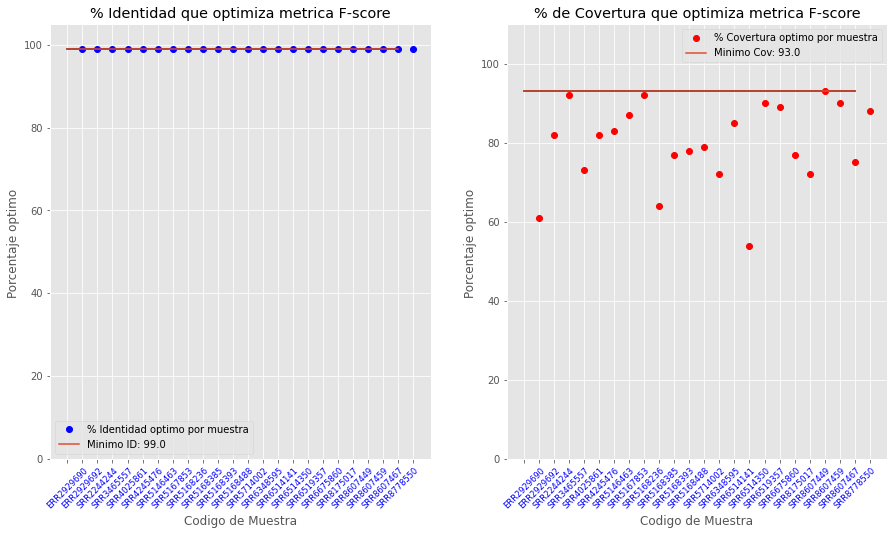

In [12]:

maximos = np.max(datap)[2:]
#print(maximos)
valores={}
muestras=datap.columns[2:]
#print(muestras)
id_cov_d=[]
#print(muestras[0],maximos[0])
#id_cov=dataf[dataf[muestras[0]]==maximos[0]]
#id_cov_d=id_cov.iloc[-1:,[0,1]]
#print(id_cov_d)
i=0
id=[]
cov=[]
dictaid={}
dictacov={}
for m in muestras:
  id_cov=datap[datap[m]==maximos[i]]
  i+=1
  #print(str(str(id_cov.iloc[-1:,[0,1]]).split('\n')[1]).split()[1:])
  #id_cov_d.append(str(str(str(id_cov.iloc[-1:,[0,1]]).split('\n')[1]).split()[1:])+' '+m)
  dictaid[m]=str(str(id_cov.iloc[-1:,[0,1]]).split('\n')[1]).split()[1]
  id.append(str(str(id_cov.iloc[-1:,[0,1]]).split('\n')[1]).split()[1])
  dictacov[m]=str(str(id_cov.iloc[-1:,[0,1]]).split('\n')[1]).split()[2]
  cov.append(str(str(id_cov.iloc[-1:,[0,1]]).split('\n')[1]).split()[2])
  #valores[m]=datap[m]
#print(id_cov)
idint=[]
covint=[]
for mm in range(len(id)):
  idint.append(float(id[mm]))
  #print(id[mm])
  covint.append(float(cov[mm]))
#print(idint)
#print(covint)
#idint=idint.sort()
#print(idint)
#covint=covint.sort()
#print(idint[:])
x=np.arange(1,len(id)+1)
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
mediaid=(np.ones_like(idint))*(np.amin(idint))
plt.plot(mediaid,'k')
plt.title("% Identidad que optimiza metrica F-score")
plt.xlabel("Codigo de Muestra")  
plt.xticks(coll,nom23,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.ylim(0,105)
plt.plot(x,idint,'bo', label = "% Identidad optimo por muestra")
plt.plot(mediaid, label = "Minimo ID: "+str(mediaid[0]))
plt.legend()
plt.subplot(1,2,2)

mediacov=(np.ones_like(covint))*(np.amax(covint))
plt.plot(mediacov,'k')
plt.title("% de Covertura que optimiza metrica F-score")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom23,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.ylim(0,110)
plt.plot(x,covint,'ro', label = "% Covertura optimo por muestra")
plt.plot(mediacov, label = "Minimo Cov: "+str(mediacov[0]))
plt.legend()


determinar el inicio 

In [ ]:
datap.head(100)

,ID,COV,ERR2929690,ERR2929692,SRR2244244,SRR3465557,SRR4025861,SRR4245476,SRR5146463,SRR5167853,SRR5168236,SRR5168385,SRR5168393,SRR5168488,SRR5714002,SRR6348595,SRR6514141,SRR6514350,SRR6519357,SRR6675860,SRR8175017,SRR8607449,SRR8607459,SRR8607467,SRR8778550
0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,51.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,51.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,51.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,51.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
f=datap.iloc[:,2:]
mediaf=[]
for dat in (f.mean(axis=0))*100:
  mediaf.append(dat)
print(np.mean(mediaf))

9.757739130434766


In [ ]:
#a=0.012732+0.010364+0.007127+0.001399+0.013720+0.008397+0.006535+0.012630+0.002178+0.004128+0.031329+0.078802+0.008050+0.035349+0.027875+0.03323+0.006203+0.102657+0.014522+0.017926+0.009802+0.009298
#a=0.020004+0.009790+0.026906+0.031826+0.053149+0.017956+0.090419+0.047637+0.046615+0.010504+0.067544+0.092251+0.045344+0.041872+0.026314+0.037277+0.044876+0.039021+0.020471+0.037553+0.010315+0.043643
a=
print(a/22)

0.03914940909090909


In [7]:
#nom=['ERR2929690','SRR2244244','SRR3465557','SRR4025861','SRR4245476','SRR5146463','SRR5167853','SRR5168236','SRR5168385','SRR5168393','SRR5168488','SRR5714002','SRR6348595','SRR6514141','SRR6514350','SRR6519357','SRR6675860','SRR8175017','SRR8607449','SRR8607459','SRR8668707','SRR8778550']
#nom25=['ERR2929690','ERR2929692','SRR2244244','SRR3465532','SRR3465557','SRR4025861','SRR4245476','SRR5146463','SRR5167853','SRR5168236','SRR5168385','SRR5168393','SRR5168488','SRR5714002','SRR6348595','SRR6514141','SRR6514350','SRR6519357','SRR6675860','SRR8175017','SRR8607449','SRR8607459','SRR8607467','SRR8668707']
nom23=['ERR2929690','ERR2929692','SRR2244244','SRR3465557','SRR4025861','SRR4245476','SRR5146463','SRR5167853','SRR5168236','SRR5168385','SRR5168393','SRR5168488','SRR5714002','SRR6348595','SRR6514141','SRR6514350','SRR6519357','SRR6675860','SRR8175017','SRR8607449','SRR8607459','SRR8607467','SRR8778550']
print(len(nom23))
#nom=[690,692,244,557,861,476,463,853,236,385,393,488,2,595,141,350,357,860,17,449,459,467,707,550]
coll=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
coll25=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
print(str(nom23))

23
['ERR2929690', 'ERR2929692', 'SRR2244244', 'SRR3465557', 'SRR4025861', 'SRR4245476', 'SRR5146463', 'SRR5167853', 'SRR5168236', 'SRR5168385', 'SRR5168393', 'SRR5168488', 'SRR5714002', 'SRR6348595', 'SRR6514141', 'SRR6514350', 'SRR6519357', 'SRR6675860', 'SRR8175017', 'SRR8607449', 'SRR8607459', 'SRR8607467', 'SRR8778550']


const    0.479167
x1      -0.020845
x2       0.003421
x3       0.000188
x4      -0.000018
x5      -0.000015
dtype: float64
-203022868784625.06
[-1.03231568e+09  3.12503517e+08]
const    0.519181
x1      -0.015806
x2       0.000154
x3       0.000111
x4       0.000008
x5      -0.000005
dtype: float64
-22779865424309.977
[-4.51005518e+08  6.84222367e+07]
const    0.598253
x1      -0.014758
x2      -0.003826
x3       0.000095
x4       0.000041
x5       0.000008
dtype: float64
-18896796010614.438
[-4.47292899e+08  6.25420233e+07]
const    1.022981
x1      -0.037136
x2       0.003436
x3       0.000298
x4      -0.000005
x5      -0.000021
dtype: float64
-11132926043695.65
[-1.91887897e+08  4.43657567e+07]
const    1.665982
x1      -0.035918
x2      -0.016353
x3       0.000238
x4       0.000085
x5       0.000079
dtype: float64
-163474171193774.8
[-7.44369785e+08 -3.52632782e+08]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


const   -0.754401
x1       0.012508
x2       0.002641
x3      -0.000016
x4      -0.000003
x5      -0.000016
dtype: float64
-5017922887.20166
[ 1.94943550e+08 -2.59917915e+08]
const    0.354930
x1      -0.012709
x2      -0.001424
x3       0.000058
x4       0.000111
x5      -0.000032
dtype: float64
-113712662195741.33
[-7.82017827e+08  7.36530994e+08]
const    1.030559
x1      -0.025792
x2      -0.006100
x3       0.000151
x4       0.000090
x5       0.000003
dtype: float64
-147191588098227.22
[-9.64796878e+08  2.79349469e+08]
const   -0.315996
x1       0.002835
x2       0.002107
x3       0.000037
x4      -0.000025
x5      -0.000004
dtype: float64
-12897008828534.61
[ 5.86332807e+08 -5.50097420e+07]
const    0.501650
x1      -0.025674
x2       0.005088
x3       0.000230
x4       0.000002
x5      -0.000031
dtype: float64
-38763377849339.336
[-3.86755619e+08  3.39272925e+08]
const    0.832074
x1      -0.026944
x2       0.001040
x3       0.000205
x4      -0.000003
x5      -0.000006
dtype: flo

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


[-6.15460131e+08  4.49884447e+07]
const   -0.402497
x1      -0.001042
x2       0.006826
x3       0.000034
x4       0.000067
x5      -0.000070
dtype: float64
-64403768040329.12
[-9.94655073e+07  9.24156807e+08]
const    0.469390
x1      -0.029875
x2       0.005999
x3       0.000304
x4       0.000007
x5      -0.000042
dtype: float64
-170695142279160.25
[-5.98653219e+08  1.67969831e+09]
const    0.535047
x1      -0.021106
x2      -0.000077
x3       0.000156
x4       0.000077
x5      -0.000028
dtype: float64
-96979821599592.47
[-6.32749177e+08  5.65573511e+08]
const    0.125644
x1      -0.010204
x2       0.002060
x3       0.000108
x4       0.000015
x5      -0.000019
dtype: float64
-18396646534449.477
[-1.38478713e+08  9.55926237e+08]
const    6.187190e-01
x1      -1.889149e-02
x2      -1.828206e-03
x3       1.429700e-04
x4       3.086271e-05
x5      -4.706032e-07
dtype: float64
-26014689043134.094
[-4.23130510e+08  1.13115506e+08]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


const    0.766245
x1      -0.023230
x2      -0.003008
x3       0.000157
x4       0.000083
x5      -0.000015
dtype: float64
-109831696179600.5
[-7.60857038e+08  4.18149085e+08]
const    1.017009e+00
x1      -3.444656e-02
x2      -2.519095e-04
x3       2.809284e-04
x4       1.067337e-05
x5      -3.162204e-07
dtype: float64
-95757139568502.52
[-5.83615865e+08  7.32662047e+07]
const    2.031012
x1      -0.075017
x2       0.009989
x3       0.000526
x4       0.000086
x5      -0.000102
dtype: float64
-237326181730321.75
[-6.30558841e+08  3.09379463e+08]
const    1.022526
x1      -0.025747
x2      -0.007286
x3       0.000152
x4       0.000103
x5       0.000009
dtype: float64
-137767267232539.08
[-9.22468985e+08  3.19179485e+08]
const    0.327948
x1      -0.015242
x2       0.000440
x3       0.000116
x4       0.000065
x5      -0.000026
dtype: float64
-47533800458791.06
[-4.53027363e+08  5.20325085e+08]
const   -0.265209
x1       0.002099
x2       0.001771
x3       0.000019
x4       0.000010
x5  

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)



[2.95709917e+08 1.78385501e+08]


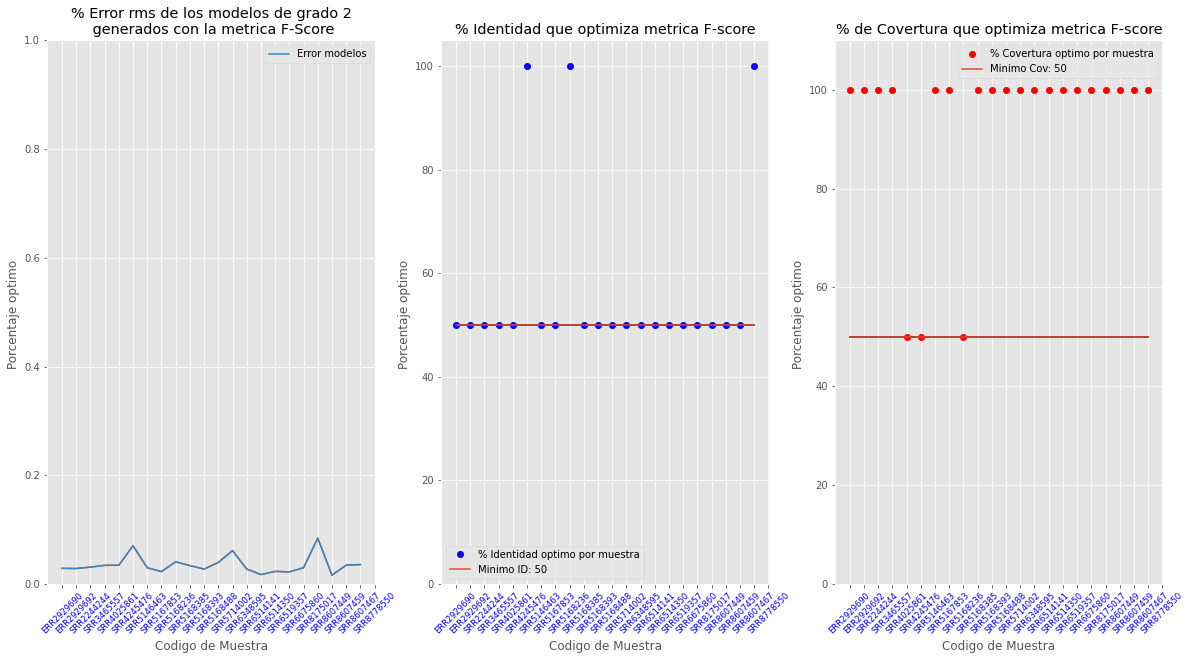

In [10]:
tabla_maximosf=[]
Error_modelosf=[]
identidad=[]
covertura=[]
grado=PolynomialFeatures(degree=2)
for col in range(2,24):
  #print(col)
  #print(dataf.iloc[:,col])
  X_train, X_test, y_train, y_test = train_test_split(datap.iloc[:,:2], datap.iloc[:,col], test_size=0.33, random_state=42)
  x_train_p=grado.fit_transform(X_train)
  x_test_p=grado.fit_transform(X_test)
  #print(x_test_p[0])
  X_t = sm.add_constant(x_train_p, prepend=True)
  modelo = sm.OLS(endog=y_train, exog=X_t,)
  modelo = modelo.fit()
  print(modelo.params)
  coef=modelo.params[:6]
  X_te = sm.add_constant(x_test_p, prepend=True)#evaluación de los modelos
  predicciones = modelo.predict(exog = X_te)
  rmse = mean_squared_error(y_true=y_test,y_pred  = predicciones,squared = False)
  #print(f"El error (rmse) de test es: {rmse}")
  Error_modelosf.append(rmse)
  def f(x):
    return -(coef[0]+coef[1]*x[0]+coef[2]*x[1]+coef[3]*x[0]**2+coef[4]*x[1]**2+coef[5]*x[0]*x[1])
  optimo=optimize.minimize(f,(50,50),method='BFGS',tol=1e-10,bounds=((50,100),(50,100)))#Powell,Nelder-Mead,CG,BFGS,L-BFGS-B
  print(optimo.fun)
  print(optimo.x)
  if (optimo.x)[0]>100:
    identidad.append(100)
  elif (optimo.x)[0]<50:
    identidad.append(50)
  else:
    identidad.append((optimo.x)[0])
  if (optimo.x)[1]>100:
    covertura.append(100)
  elif (optimo.x)[1]<50:
    covertura.append(50)
  else:
    covertura.append((optimo.x)[1])
  #tabla_maximosf.append(optimo.x)
#print(Error_modelosf)
#print(tabla_maximosf)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.plot(Error_modelosf)
plt.title("% Error rms de los modelos de grado 2\n generados con la metrica F-Score")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom23,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.plot(Error_modelosf, label = "Error modelos")
plt.ylim(0,1)
plt.legend()
plt.subplot(1,3,2,)

mediaid=(np.ones_like(identidad))*(np.amin(identidad))
plt.plot(mediaid,'k')
plt.title("% Identidad que optimiza metrica F-score")
plt.xlabel("Codigo de Muestra")  
plt.xticks(coll,nom23,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.ylim(0,105)
plt.plot(identidad,'bo', label = "% Identidad optimo por muestra")
plt.plot(mediaid, label = "Minimo ID: "+str(mediaid[0]))
plt.legend()
plt.subplot(1,3,3)
mediacov=(np.ones_like(covertura))*(np.amin(covertura))
plt.plot(mediacov,'k')
plt.title("% de Covertura que optimiza metrica F-score")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom23,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.ylim(0,110)
plt.plot(covertura,'ro', label = "% Covertura optimo por muestra")
plt.plot(mediacov, label = "Minimo Cov: "+str(mediacov[0]))
plt.legend()



-0.6393035726660147
[ 0.         93.62749258]


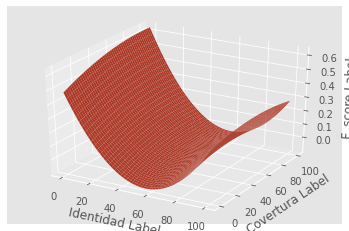

In [ ]:
col=2
X_train, X_test, y_train, y_test = train_test_split(datap.iloc[:,:2], datap.iloc[:,col], test_size=0.33, random_state=42)
x_train_p=grado.fit_transform(X_train)
x_test_p=grado.fit_transform(X_test)
#print(x_test_p[0])
X_t = sm.add_constant(x_train_p, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_t,)
modelo = modelo.fit()
#print(modelo.params[:6])
coef=modelo.params[:6]
X_te = sm.add_constant(x_test_p, prepend=True)#evaluación de los modelos
predicciones = modelo.predict(exog = X_te)
rmse = mean_squared_error(y_true=y_test,y_pred  = predicciones,squared = False)
#print(f"El error (rmse) de test es: {rmse}")
Error_modelosf.append(rmse)
def f(x):
  return -(coef[0]+coef[1]*x[0]+coef[2]*x[1]+coef[3]*x[0]**2+coef[4]*x[1]**2+coef[5]*x[0]*x[1])
optimo=optimize.minimize(f,(50,50),method='SLSQP',tol=1e-10,bounds=((0,100),(0,100)))
print(optimo.fun)
print(optimo.x)
#graficar funcion
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, 100, 0.05)
y = np.arange(0, 100, 0.05)
#x = y = np.arange(0, 100, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([-f((x,y)) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Identidad Label')
ax.set_ylabel('Covertura Label')
ax.set_zlabel('F_score Label')
#ax.plot(,)
plt.show()

        ID   COV  ERR2929690  ...  SRR8607459  SRR8607467  SRR8778550
48    50.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
98    51.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
148   52.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
198   53.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
248   54.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
298   55.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
348   56.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
398   57.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
448   58.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
498   59.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
548   60.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
598   61.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
648   62.0  98.0      0.0000  ...      0.0000      0.0000      0.0000
698   63.0  98.0    

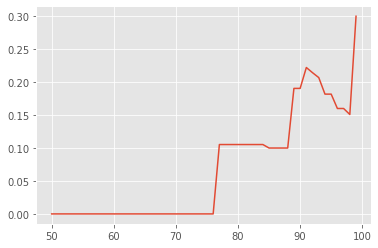

In [ ]:

datos_98_filt=datap['COV']==98.0
datos_98=datap[datos_98_filt]#planets['year'] == 2008
print(datos_98)
x=datos_98['ID']
#y=datos_98[:,1]
z=datos_98['ERR2929690']
plt.plot(x,z)
#plt.scatter(X_train[1],y_train)
#plt.show()

0        0.0
1        2.0
2        4.0
3        6.0
4        8.0
        ... 
2495    90.0
2496    92.0
2497    94.0
2498    96.0
2499    98.0
Name: COV, Length: 2500, dtype: float64


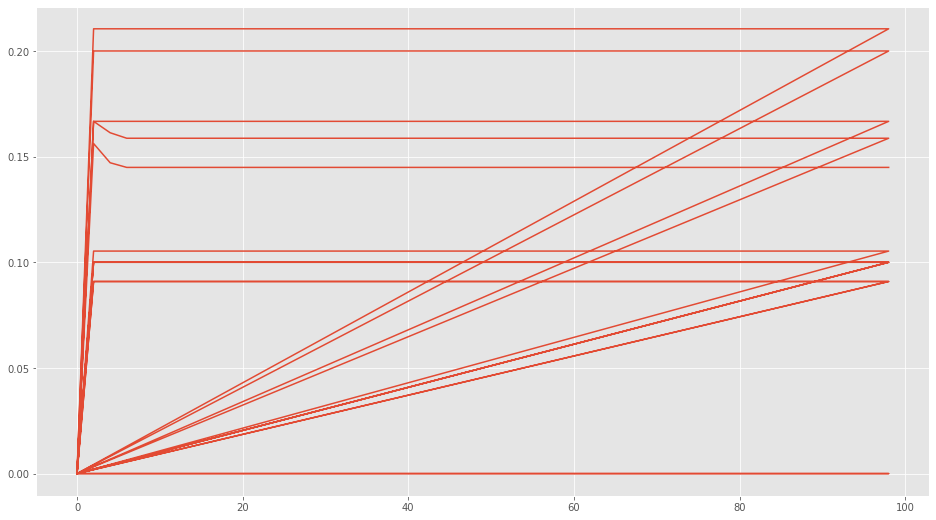

In [ ]:
y=dataf.iloc[:,1]
z=dataf.iloc[:,2]
plt.plot(y,z)
print(y)